## Housing Case Study
Problem Statement:

Consider a real estate company that has a dataset containing the prices of properties in the Delhi region. It wishes to use the data to optimise the sale prices of the properties based on important factors such as area, bedrooms, parking, etc.

Essentially, the company wants —

To identify the variables affecting house prices, e.g. area, number of rooms, bathrooms, etc.

To create a linear model that quantitatively relates house prices with variables such as number of rooms, area, number of bathrooms, etc.

To know the accuracy of the model, i.e. how well these variables can predict house prices.

In [2]:
#1 Import the dataset (Housing.csv) and look at the top five rows
import pandas as pd
df = pd.read_csv('Housing.csv')
df
print(df.head())

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


In [5]:
#2 Check the shape of the DataFrame (rows, columns)
print(df.shape)

(545, 13)


In [9]:
#3 Look at the data types of the columns
df.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [10]:
#4 Check for missing  values if any, replace with appropriate values
df.isnull()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,False,False,False,False,False,False,False,False,False,False,False,False,False
541,False,False,False,False,False,False,False,False,False,False,False,False,False
542,False,False,False,False,False,False,False,False,False,False,False,False,False
543,False,False,False,False,False,False,False,False,False,False,False,False,False


In [12]:
#5 Prepare  X (independent variables) and y (dependent variable)
# Assume the dataset is already imported as `df`

# Select the dependent variable (e.g., 'Price')
y = df['price']

# Select independent variables (e.g., all columns except 'Price')
X = df.drop('price', axis=1)

# Display the first few rows of X and y
print("Independent Variables (X):")
print(X.head())
print("\nDependent Variable (y):")
print(y.head())


Independent Variables (X):
   area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  7420         4          2        3      yes        no       no   
1  8960         4          4        4      yes        no       no   
2  9960         3          2        2      yes        no      yes   
3  7500         4          2        2      yes        no      yes   
4  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  

Dependent Variable (y):
0    13300000
1    12250000
2    12250000
3    12215000
4    11410000
Name: price, dtype: int64


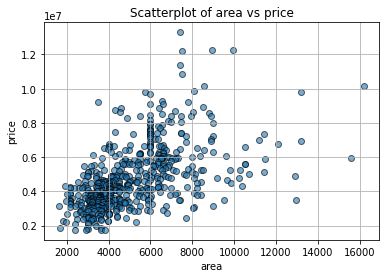

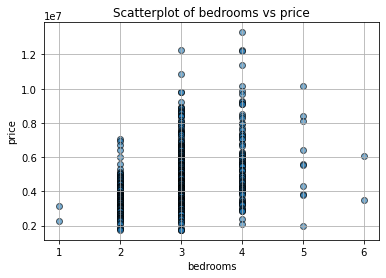

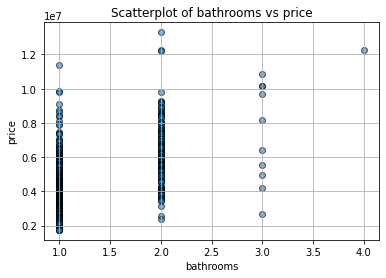

In [17]:
#6 Visualise the relationship between the independent variables and the depenedent variable using scatterplots
import matplotlib.pyplot as plt

# Assuming `df` is the DataFrame and the dependent variable is `Price`
# Independent variables
independent_vars = ['area', 'bedrooms', 'bathrooms']  # Replace with your actual column names

# Dependent variable
dependent_var = 'price'

# Scatterplots for each independent variable against the dependent variable
for col in independent_vars:
    plt.figure(figsize=(6, 4))
    plt.scatter(df[col], df[dependent_var], alpha=0.6, edgecolor='k')
    plt.title(f"Scatterplot of {col} vs {dependent_var}")
    plt.xlabel(col)
    plt.ylabel(dependent_var)
    plt.grid(True)
    plt.show()


In [20]:
#7 Encoding categorical data in X
from sklearn.preprocessing import LabelEncoder

# Assuming 'X' is the DataFrame containing your features
# Example: Let's say the 'City' column is categorical and needs encoding
label_encoder = LabelEncoder()

# Apply Label Encoding on a specific column, e.g., 'City'
X['mainroad'] = label_encoder.fit_transform(X['mainroad'])

# Now, the 'City' column will contain numeric values instead of categorical values


In [21]:
#8  Avoiding the Dummy Variable Trap
import numpy as np
import pandas as pd

# Assuming df is your original DataFrame with categorical data in the 'Category' column
# Example DataFrame

# Step 1: Apply One-Hot Encoding using pd.get_dummies()
encoded_df = pd.get_dummies(df, drop_first=True)  # Drop the first column to avoid dummy variable trap

# Now the 'Category' column has been replaced with 'Category_B' and 'Category_C'
# This avoids multicollinearity because we dropped 'Category_A'
print(encoded_df)


        price  area  bedrooms  bathrooms  stories  parking  mainroad_yes  \
0    13300000  7420         4          2        3        2          True   
1    12250000  8960         4          4        4        3          True   
2    12250000  9960         3          2        2        2          True   
3    12215000  7500         4          2        2        3          True   
4    11410000  7420         4          1        2        2          True   
..        ...   ...       ...        ...      ...      ...           ...   
540   1820000  3000         2          1        1        2          True   
541   1767150  2400         3          1        1        0         False   
542   1750000  3620         2          1        1        0          True   
543   1750000  2910         3          1        1        0         False   
544   1750000  3850         3          1        2        0          True   

     guestroom_yes  basement_yes  hotwaterheating_yes  airconditioning_yes  \
0        

In [22]:
#9 Apply feature scaling on numerical variables
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Assuming `df` is the DataFrame and you want to scale the numerical columns

# Step 1: Select the numerical variables (e.g., 'Area', 'Bedrooms', 'Bathrooms')
numerical_vars = ['area', 'bedrooms', 'bathrooms']

# Step 2: Standardization - Z-score normalization
scaler_standard = StandardScaler()
df[numerical_vars] = scaler_standard.fit_transform(df[numerical_vars])

# Step 3: Min-Max Scaling
scaler_minmax = MinMaxScaler()
df[numerical_vars] = scaler_minmax.fit_transform(df[numerical_vars])

# Display the scaled DataFrame
print(df.head())


      price      area  bedrooms  bathrooms  stories mainroad guestroom  \
0  13300000  0.396564       0.6   0.333333        3      yes        no   
1  12250000  0.502405       0.6   1.000000        4      yes        no   
2  12250000  0.571134       0.4   0.333333        2      yes        no   
3  12215000  0.402062       0.6   0.333333        2      yes        no   
4  11410000  0.396564       0.6   0.000000        2      yes       yes   

  basement hotwaterheating airconditioning  parking prefarea furnishingstatus  
0       no              no             yes        2      yes        furnished  
1       no              no             yes        3       no        furnished  
2      yes              no              no        2      yes   semi-furnished  
3      yes              no             yes        3      yes        furnished  
4      yes              no             yes        2       no        furnished  


In [23]:
#10 Split Data into Training and Testing Sets (70%-Train 30%-Test) - X_train, y_train, X_test, y_test
from sklearn.model_selection import train_test_split

# Assuming `X` contains the independent variables and `y` contains the dependent variable (Price)
# X = df.drop('Price', axis=1)  # Independent variables
# y = df['Price']  # Dependent variable (Price)

# Split the data into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Display the shapes of the training and testing sets
print("Training features shape:", X_train.shape)
print("Testing features shape:", X_test.shape)
print("Training labels shape:", y_train.shape)
print("Testing labels shape:", y_test.shape)


Training features shape: (381, 12)
Testing features shape: (164, 12)
Training labels shape: (381,)
Testing labels shape: (164,)


In [46]:
#11fitting multiple linera regression to the traning
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Assuming 'X' is the input feature matrix and 'y' is the target variable

# Sample dataset creation for demonstration (replace with your actual data)
# X = pd.DataFrame({'price': [1000, 2000, 1500], 'area': [1200, 1500, 1100], 'bedrooms': [2, 3, 2], 
#                   'bathrooms': [1, 2, 1], 'stories': [2, 3, 2], 'mainroad': ['yes', 'no', 'yes'], 'guestroom': ['yes', 'yes', 'no']})
# y = pd.Series([500000, 700000, 600000])

# Convert all categorical columns to numeric using LabelEncoder or pd.get_dummies
label_encoder = LabelEncoder()
for column in X.columns:
    if X[column].dtype == 'object':  # If the column is of type string
        X[column] = label_encoder.fit_transform(X[column])

# OR use pd.get_dummies for one-hot encoding
# X = pd.get_dummies(X, drop_first=True)  # Drop the first column to avoid multicollinearity

# Split the dataset into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Linear Regression model
LR = LinearRegression()

# Fit the model to the training data
LR.fit(X_train, y_train)

# Output the coefficients (weights) and intercept of the trained model
print("Coefficients (weights):", LR.coef_)
print("Intercept:", LR.intercept_)

# Make predictions on the training set
y_train_pred = LR.predict(X_train)

# Calculate the error (predicted - actual)
train_error = y_train_pred - y_train
print("Prediction error on the training set:", train_error)

# Optional: Evaluate the model on the test set
y_test_pred = LR.predict(X_test)
test_error = y_test_pred - y_test
print("Prediction error on the test set:", test_error)


Coefficients (weights): [ 6.46198517e+01  8.12480939e+04  1.11452078e+06  3.97472428e+05
  3.23345351e+05  1.95907167e+05  4.78193862e+05  6.22612546e+05
  6.21866350e+05  2.86585832e+05  4.83180734e+05 -2.07324117e+05
  6.28257201e+03]
Intercept: 422693.3543298729
Prediction error on the training set: 126   -3.820689e+05
363   -2.028059e+05
370    7.735933e+05
31    -1.883588e+06
113    2.335644e+05
           ...     
71    -1.203897e+05
106    2.959819e+05
270    2.062834e+06
435   -3.822336e+05
102    9.090656e+05
Name: price, Length: 381, dtype: float64
Prediction error on the test set: 316    1.567641e+06
77     5.553975e+05
360   -5.949095e+05
90    -1.854442e+06
493    5.545152e+05
           ...     
395    1.936246e+05
425    6.318365e+05
195    2.153875e+06
452    2.336426e+06
154   -4.307625e+05
Name: price, Length: 164, dtype: float64


In [48]:
#12 Predict on the train set and calculate the error = y_pred - y_train
# Make predictions on the training set
y_train_pred = LR.predict(X_train)

# Calculate the error (predicted - actual)
train_error = y_train_pred - y_train

# Output the predictions and error
print("Predicted values on the training set:", y_train_pred)
print("Actual values (y_train):", y_train)
print("Prediction error on the training set:", train_error)


Predicted values on the training set: [ 5497931.06349976  3507194.12152765  4413593.31976882  6516412.18390682
  6316564.44099345  6124775.28972766  3042895.04786318  4815335.17218279
  8698832.40199162  5204477.97596566  7392083.12451134  8148794.30958277
  3497859.84319393  6426305.11979739  5455209.42372519  4464720.73108826
  3327107.36918873  4165498.38884968  6506653.86247099  5922500.88878879
  5379758.8151787   3724579.79748724  6701440.93311808  3120468.93975035
  3020547.22701427  2830041.12678103  8653524.70988256  6174408.18355867
  6363213.85782198  4544420.94757666  4763711.22173061  7466804.06849901
  5376827.15618511  4131219.59551068  2907766.41556935  8511634.39864036
  4632162.73205675  5316638.21510953  5826368.07932961  5595651.11726025
  2549775.38231767  5745606.36285334  3335625.99218217  4783724.19742025
  7155836.30101865  5680249.89569356  5661381.53944847  7917968.0486745
  7700947.62113668  6228240.42698535  7114726.14383387  3993292.92773208
  8306330.3334

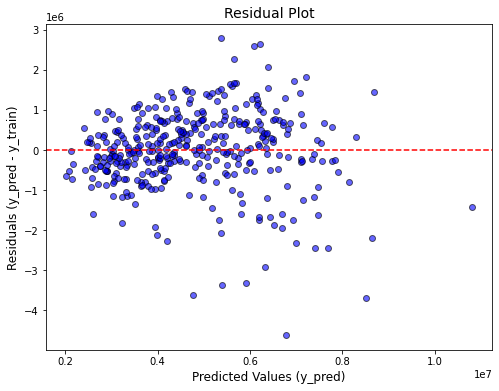

In [49]:
#13  Residual plot - plot y_pred in x axis and errors in y axis
# Importing required libraries for plotting
import matplotlib.pyplot as plt

# Calculate the residuals (errors)
residuals = y_train_pred - y_train

# Create the residual plot
plt.figure(figsize=(8, 6))
plt.scatter(y_train_pred, residuals, color='blue', edgecolor='k', alpha=0.6)

# Adding labels and title
plt.title('Residual Plot', fontsize=14)
plt.xlabel('Predicted Values (y_pred)', fontsize=12)
plt.ylabel('Residuals (y_pred - y_train)', fontsize=12)

# Adding a horizontal line at 0 for reference
plt.axhline(y=0, color='r', linestyle='--')

# Show the plot
plt.show()


In [50]:
#14  Predic on the test set
# Make predictions on the test set
y_test_pred = LR.predict(X_test)

# Calculate the error (predicted - actual) for the test set
test_error = y_test_pred - y_test
print("Prediction error on the test set:", test_error)

# Evaluate the performance on the test set (optional)
from sklearn.metrics import mean_squared_error, r2_score

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_test_pred)
print("Mean Squared Error (MSE):", mse)

# R-squared value (goodness of fit)
r2 = r2_score(y_test, y_test_pred)
print("R-squared value:", r2)


Prediction error on the test set: 316    1.567641e+06
77     5.553975e+05
360   -5.949095e+05
90    -1.854442e+06
493    5.545152e+05
           ...     
395    1.936246e+05
425    6.318365e+05
195    2.153875e+06
452    2.336426e+06
154   -4.307625e+05
Name: price, Length: 164, dtype: float64
Mean Squared Error (MSE): 1558831992662.0278
R-squared value: 0.6380189546360573


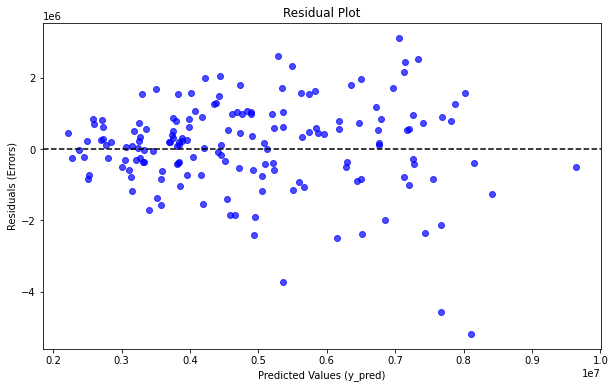

In [51]:
#15 Residual plot - plot y_pred in x axis and errors in y axis
import matplotlib.pyplot as plt

# Calculate the residuals
residuals = y_test_pred - y_test

# Create the residual plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test_pred, residuals, color='blue', alpha=0.7)
plt.axhline(y=0, color='black', linestyle='--')  # Add a horizontal line at y=0 for reference
plt.title('Residual Plot')
plt.xlabel('Predicted Values (y_pred)')
plt.ylabel('Residuals (Errors)')
plt.show()


In [52]:
#16 Print Mean Squared Error and R Squared Value
from sklearn.metrics import mean_squared_error, r2_score

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_test_pred)

# Calculate R-squared value
r2 = r2_score(y_test, y_test_pred)

# Print MSE and R-squared value
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared value: {r2}")


Mean Squared Error (MSE): 1558831992662.0278
R-squared value: 0.6380189546360573


In [56]:
#17 Check  Adjusted R Squared Value(by selecting different no of input variables insted of all)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import itertools

# Define the function to calculate Adjusted R-squared
def calculate_adjusted_r2(X_train, X_test, y_train, y_test):
    # Train the model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Calculate R-squared
    r2 = r2_score(y_test, y_pred)
    
    # Calculate Adjusted R-squared
    n = len(y_test)  # Number of samples
    p = X_test.shape[1]  # Number of features
    adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    
    return adjusted_r2

# Iterate through different combinations of features (columns) in the dataset
X_columns = X.columns.tolist()
best_adjusted_r2 = None
best_combination = None

# Try different combinations of features
for r in range(1, len(X_columns) + 1):
    for combination in itertools.combinations(X_columns, r):
        X_train_subset = X_train[list(combination)]
        X_test_subset = X_test[list(combination)]
        
        adjusted_r2 = calculate_adjusted_r2(X_train_subset, X_test_subset, y_train, y_test)
        
        # Keep track of the best Adjusted R-squared value
        if best_adjusted_r2 is None or adjusted_r2 > best_adjusted_r2:
            best_adjusted_r2 = adjusted_r2
            best_combination = combination

# Output the best combination of features and the corresponding Adjusted R-squared value
print(f"Best feature combination: {best_combination}")
print(f"Best Adjusted R-squared value: {best_adjusted_r2}")


Best feature combination: ('area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus')
Best Adjusted R-squared value: 0.6250359815273943
